In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

## Data

In [ ]:
df = pd.read_csv("/content/MNIST_train.csv")

In [ ]:
print(df.shape)
print(df.columns)

(60000, 787)
Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)


In [ ]:
df = df.drop(['Unnamed: 0', 'index'], axis=1)

In [ ]:
df.drop_duplicates()
df.shape

(60000, 785)

In [ ]:
data = df.to_numpy()
X = data[:,1:]
y = data[:, 0]

In [ ]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


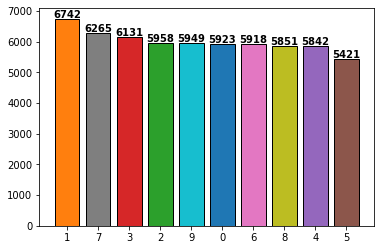

In [ ]:
def addlabels(x,y, space=50):
    for i in range(len(x)):
        plt.text(i, y[i]+space, y[i], ha='center', fontweight="bold")
c = [
        'tab:orange', 'tab:gray', 'tab:red',
        'tab:green', 'tab:cyan', 'tab:blue',
        'tab:pink', 'tab:olive', 'tab:purple','tab:brown'
]
idx_vals = pd.Series(y).value_counts()
plt.bar([str(x) for x in idx_vals.index], idx_vals.values, tick_label=idx_vals.index, color=c, edgecolor="black")
addlabels(idx_vals.index, idx_vals.values)
# plt.savefig('train_bar.png', bbox_inches="tight")

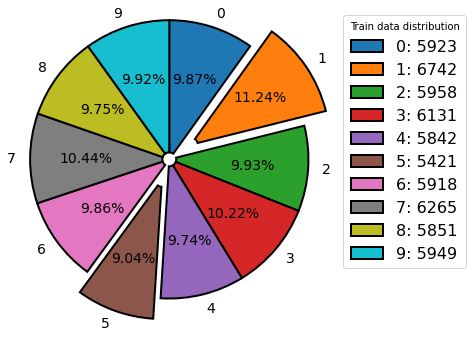

In [ ]:
idx_vals = pd.Series(y).value_counts().sort_index()
colors = ['tab:blue','tab:orange','tab:green',
          'tab:red','tab:purple','tab:brown',
          'tab:pink','tab:gray','tab:olive','tab:cyan']
temp_labels = [
    "0: 5923", "1: 6742", "2: 5958",
    "3: 6131", "4: 5842", "5: 5421",
    "6: 5918", "7: 6265", "8: 5851",
    "9: 5949"
]
plt.pie(x=idx_vals.values, labels=idx_vals.index, 
        colors=colors, radius=1.6, startangle=90, counterclock=False,
        explode = [0,0.3,0,0,0,0.25,0,0,0,0], # Cut slices out
        autopct = "%0.2f%%", # Shows percentages in 2 decimals
        wedgeprops={"edgecolor":"black", "linewidth": 2, 'width':1.52},
        textprops={"fontsize":14},#, "weight":"bold"}
        )
# plt.legend(labels=temp_labels, loc=(1.3,0), fontsize=16)
plt.legend(title="Train data distribution", labels=temp_labels, loc=(1.3,0), fontsize=16)
plt.plot()
plt.savefig('train_pie.png', bbox_inches="tight")

In [ ]:
# Checking for missing
df.isnull().sum().sum()

0

In [ ]:
# Checking if any inconsistencies in column dtypes exist
df.dtypes
sett = set([])
for i in df.dtypes:
    sett.add(i)
sett

{dtype('int64')}

In [ ]:
# Functions for getting and viewing instances
def digit_info(X, y, idx):
    """
    """
    try:
        print(y[idx])
        plt.imshow(X[idx].reshape(28,28))
    except IndexError:
        print("IndexError: Index out of bounds")

def view_digit(x):
    """ Displays the given instance
    NumpyArray: X -> A row vector with 784 values 
    """
    try:
        plt.imshow(x.reshape(28,28))
    except ValueError:
        print(f"ValueError: Cannot reshape {len(x)} into (28,28)")

def get_mean(X, y, k):
    """ returns a row vector with the mean values for the given class
    NumpyArray: X -> An n by m matrix of instances
    NumpyArray: y -> A len(X) row vector of class labels 
    Int: K        -> The label in question 
    """
    return sum(X[y==k,:]/len(X[y==k,:]))

def view_mean(X, y, k):
    """ Displays the a mean representation of the given class in X
    NumpyArray: X -> An n by m matrix of instances
    NumpyArray: y -> A len(X) row vector of class labels 
    Int: K        -> The label in question 
    """
    view_digit(get_mean(X, y, k))

def min_max_scaling(x):
    return (x - x.min())/(x.max() - x.min())

def acc(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
X_norm = X.copy()
for i, row in enumerate(X_norm):
    X_norm[i] = min_max_scaling(row)

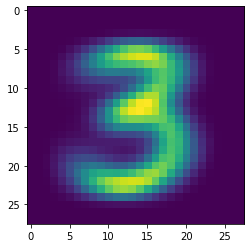

In [ ]:
view_mean(X,y,3)

2


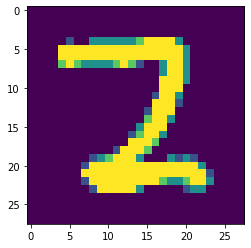

In [ ]:
digit_info(X, y, 5236)

In [ ]:
df_test = pd.read_csv("/content/MNIST_test.csv")
df_test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.drop_duplicates()
df_test.shape

(10000, 787)

In [ ]:
df_test = df_test.drop(['Unnamed: 0', 'index'], axis=1)
data_test = df_test.to_numpy()
X_test = data_test[:,1:]
y_test = data_test[:, 0]

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(pd.Series(y_test).value_counts().sort_index())

(10000, 784)
(10000,)
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64


In [ ]:
sett2 = set([])
for i in df_test.dtypes:
    sett2.add(i)
sett2

{dtype('int64')}

[]

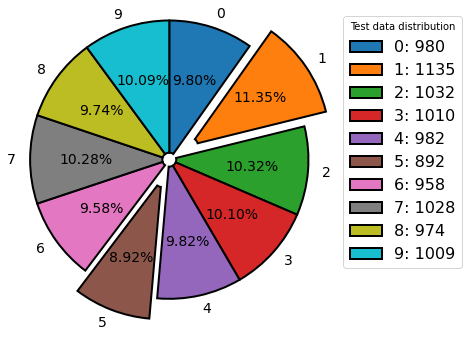

In [ ]:
temp_labels_test = [
    "0: 980", "1: 1135", "2: 1032", "3: 1010",
    "4: 982", "5: 892", "6: 958", 
    "7: 1028", "8: 974", "9: 1009"
]
idx_vals_test = pd.Series(y_test).value_counts().sort_index()
plt.pie(x=idx_vals_test.values, labels=idx_vals_test.index, 
        colors=colors, radius=1.6, startangle=90, counterclock=False,
        explode = [0,0.3,0,0,0,0.25,0,0,0,0], # Cut slices out
        autopct = "%0.2f%%", # Shows percentages in 2 decimals
        wedgeprops={"edgecolor":"black", "linewidth": 2, 'width':1.52},
        textprops={"fontsize":14},#, "weight":"bold"}
        )
plt.legend(title="Test data distribution", labels=temp_labels_test, loc=(1.3,0), fontsize=16)
plt.plot()
# plt.savefig('test_pie.png', bbox_inches="tight")

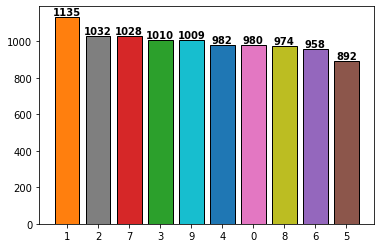

In [ ]:
c2 = [
        'tab:orange', 'tab:gray', 'tab:red',
        'tab:green', 'tab:cyan', 'tab:blue',
        'tab:pink', 'tab:olive', 'tab:purple','tab:brown'
]
idx_vals_test = pd.Series(y_test).value_counts()
plt.bar([str(x) for x in idx_vals_test.index], idx_vals_test.values, tick_label=idx_vals_test.index, color=c2, edgecolor="black")
addlabels(idx_vals_test.index, idx_vals_test.values, space=10)
# plt.savefig('test_bar.png', bbox_inches="tight")

## Classifiers

In [ ]:
class GaussNB():
  
    likelihoods = dict()   # 
    priors = dict()        # 
    K = int()              # K stands for the number of classes
  
    def fit(self, X, y, epsilon=1e-3):
        """ 
        Method for training the model
        Creates likelihoods and priors (AKA weights & Biases) the represent
        the trained value. 
        """
        self.K = set(y.astype(int)) 
        for k in self.K: 
            X_k = X[y==k, :]
            self.likelihoods[k] = {
                "Mean": X_k.mean(axis=0), # Where the data is situated
                "CoVariance": X_k.var(axis=0)+epsilon # The shape of the distribution
            }
            self.priors[k] = len(X-k)/len(X) # MAY BE WRONG

    def predict(self, X):
        """
        Where inference happens. 
        Predicts the class for each instance of X with Bayes theorem using the 
        likelihoods and priors (weights & biases) calculated during training. 
        """
        N, D = X.shape  # numRows, numFeatures
        P_hat = np.zeros((N, len(self.K))) # Predictive Probability
        for k, l in self.likelihoods.items():
            # Bayes Theorem Application
            P_hat[:,k] = mvn.logpdf(X, l["Mean"], l["CoVariance"]) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [ ]:
class KNNClassifier():

    def fit(self, X, y):
        self.X = X
        self.y = y.astype(int)

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)
        # Calculating distances from one point to every other point
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)  # List of distances
            idxtK = np.argsort(dist2)[:K]    # Indecies in order from smallest to largest up to K
            gamma = 1/(np.sqrt(dist2[idxtK]+epsilon))
            y_hat[i] = np.bincount(self.y[idxtK], weights=gamma).argmax()
        return y_hat

In [ ]:
class GaussBayes():
  
    likelihoods = dict()   # 
    priors = dict()        # 
    K = int()              # K stands for the number of classes
  
    def fit(self, X, y, epsilon=1e-3):
        """ 
        Method for training the model
        Creates likelihoods and priors (AKA weights & Biases) the represent
        the trained value. 
        """
        self.K = set(y.astype(int)) 
        for k in self.K: 
            X_k = X[y==k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {
                "Mean": mu_k, # X_k.mean(axis=0), # Where the data is situated
                "CoVariance": 
                    (1/(N_k-1))
                    *np.matmul((X_k-mu_k).T, (X_k-mu_k))
                    +epsilon*np.identity(D)
            }
            self.priors[k] = len(X_k)/len(X)

    def predict(self, X):
        """
        Where inference happens. 
        Predicts the class for each instance of X with Bayes theorem using the 
        likelihoods and priors (weights & biases) calculated during training. 
        """
        N, D = X.shape  # numRows, numFeatures
        P_hat = np.zeros((N, len(self.K))) # Predictive Probability
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(
                X, 
                l["Mean"], 
                l["CoVariance"]) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

## Models

#### GaussBayes

In [ ]:
GB = GaussBayes()
GB.fit(X_norm, y)

In [ ]:
GB_yhat = GB.predict(X_test)

In [ ]:
GB_acc = acc(y_test, GB_yhat)
print(GB_acc)
# train on X_norm and test on X_test -> .9029

0.9029


#### KNN

In [ ]:
knn = KNNClassifier()
knn.fit(X, y)

In [ ]:
knn_yhat = knn.predict(X_test, K=10)

In [ ]:
knn_acc = acc(y_test, knn_yhat)
print(knn_acc)
# 10 neighbors -> X      -> 45min training -> .9684 acc
# 30 neighbors -> X      -> 30min           -> .9604
# 10 neighbors -> X_norm -> 51min training -> .7646 acc

0.9684


## Not sure

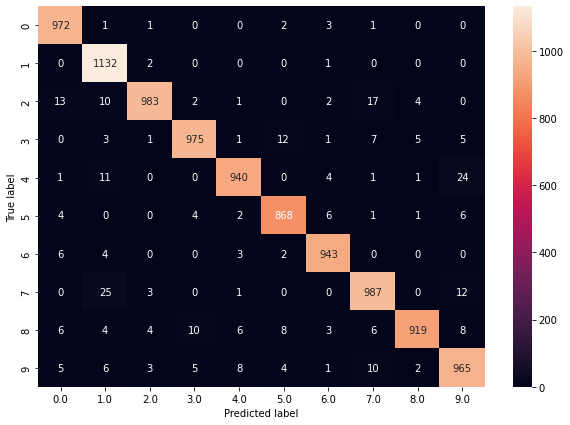

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(knn_yhat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confused.png', bbox_inches="tight")